In [2]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

In [4]:
hp_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/machine_learning/data/comet_opt/shmaronshmevans_hyperparameter_tuning_for_lstm_new_view_table_data.csv"
)
hp_df

,Name,Tags,Server end time,File name,Duration,User Name,forecast_lead,sequence_length,Batch size,Learning Rate,Current Step,Loss,num_hidden_units,num_layers
0,faithful_sash_1618,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28790,shmaronshmevans,476,75,198,0.000753,5735,0.027163,175,7
1,keen_alpaca_9798,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28784,shmaronshmevans,476,75,198,0.000753,5676,0.033374,175,7
2,skilled_planarian_829,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28797,shmaronshmevans,21,143,156,0.000741,6158,0.093445,125,8
3,thundering_bow_5898,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28797,shmaronshmevans,21,143,156,0.000741,6062,0.109208,125,8
4,left_xerinae_5032,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28776,shmaronshmevans,352,335,805,0.000559,294,0.166179,709,4
5,regional_anaconda_7756,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28783,shmaronshmevans,663,84,254,0.000207,434,0.201180,697,8
6,sure_siding_6642,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28783,shmaronshmevans,663,84,254,0.000207,447,0.316585,697,8
7,mighty_skillet_1377,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28798,shmaronshmevans,353,668,741,0.000185,266,0.361590,590,6
8,forthcoming_airport_7976,western_plat_hyperparams,1.690490e+12,t2m_hrrr_fh2_western_plateau.py,172809,shmaronshmevans,913,767,8,0.004198,1136,0.364906,8,57
9,great_whitefish_7716,NaN,1.690970e+12,t2m_hrrr_fh2_western_plateau.py,21601,shmaronshmevans,4,221,602,0.000142,1105,0.380637,120,18


In [5]:
hp_df = hp_df[hp_df["File name"] == "t2m_hrrr_fh2_western_plateau.py"]

In [6]:
len(hp_df["Name"])

11

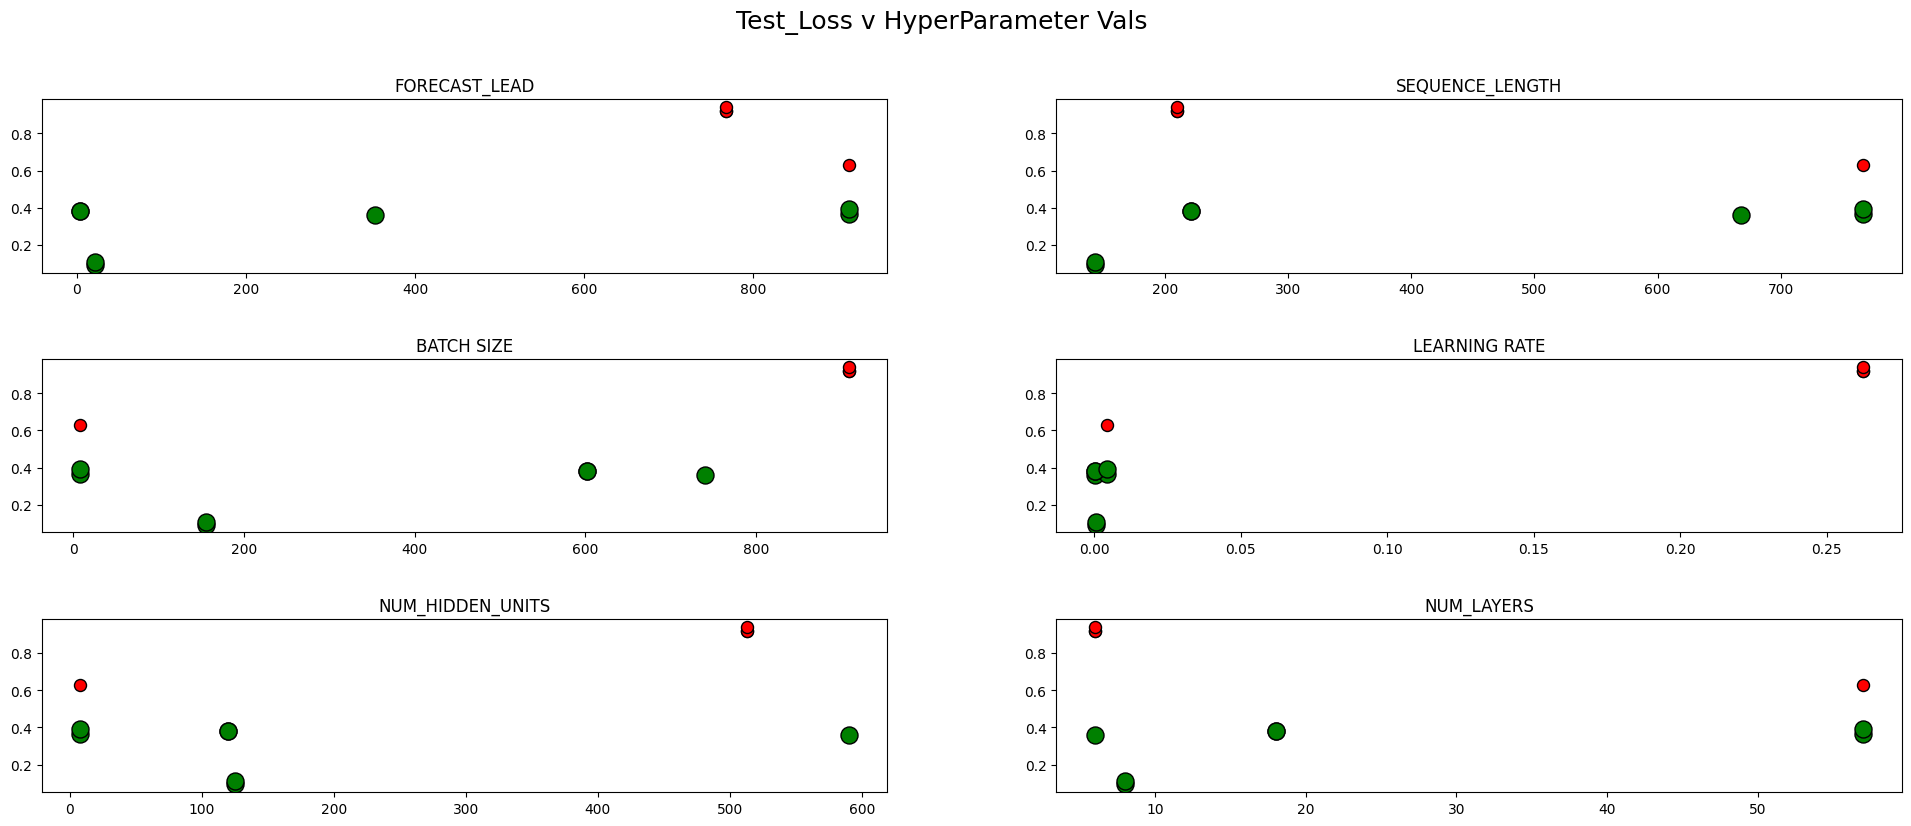

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(24, 9))
fig.suptitle("Test_Loss v HyperParameter Vals", fontsize=18)
plt.subplots_adjust(hspace=0.5)
hyper_params = [
    "forecast_lead",
    "sequence_length",
    "Batch size",
    "Learning Rate",
    "num_hidden_units",
    "num_layers",
]
for c, ax in zip(hyper_params, axs.ravel()):
    # chart formatting
    ax = ax
    for i, _ in enumerate(hp_df["Loss"]):
        if hp_df["Loss"].iloc[i] < 0.45:
            ax.scatter(
                hp_df[c].iloc[i],
                hp_df["Loss"].iloc[i],
                c="green",
                s=150,
                edgecolors="black",
            )
        else:
            ax.scatter(
                hp_df[c].iloc[i],
                hp_df["Loss"].iloc[i],
                c="red",
                s=75,
                edgecolors="black",
            )
    ax.set_title(c.upper())
    ax.set_xlabel("")

In [8]:
df = pd.DataFrame()
df["trial"] = ["trial1", "trial2", "trial3", "trial4"]
mi = [1.14, 1.39, 1.77, 1.45]
all_trials = [1.09, 1.39, 1.29, 1.44]

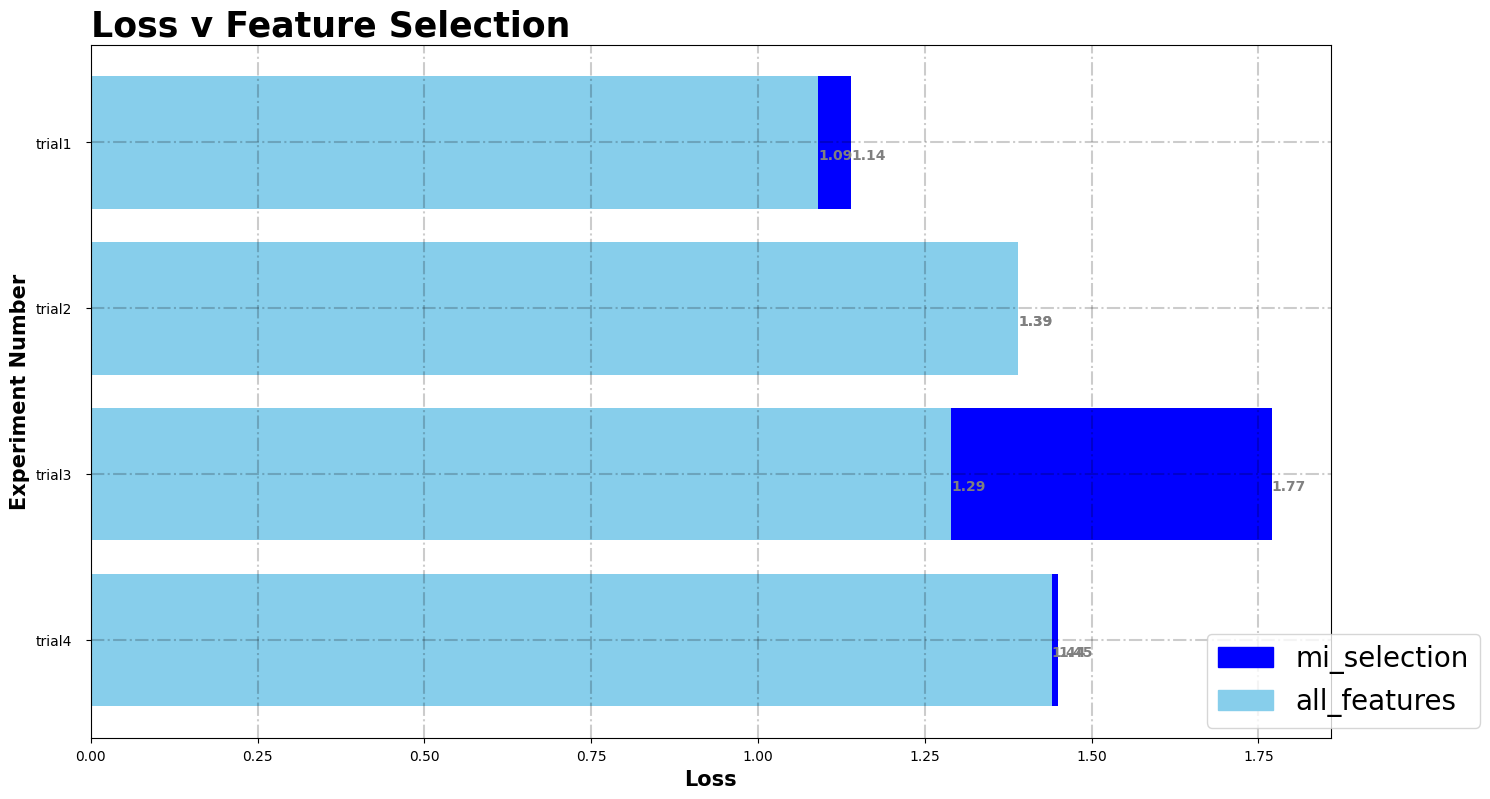

In [9]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Horizontal Bar Plot
ax.barh(df["trial"], mi, color="blue")
ax.barh(df["trial"], all_trials, color="skyblue")
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(color="black", linestyle="-.", linewidth=1.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(
        i.get_width(),
        i.get_y() + 0.5,
        str(round((i.get_width()), 2)),
        fontsize=10,
        fontweight="bold",
        color="grey",
    )


# Add Plot Title
ax.set_title("Loss v Feature Selection", loc="left", fontweight="bold", fontsize=25)
plt.xlabel("Loss", fontweight="bold", fontsize=15)
plt.ylabel("Experiment Number", fontweight="bold", fontsize=15)

COLORS = ["blue", "skyblue"]
LEG_STR = ["mi_selection", "all_features"]
# legend
patches = []
for i, _ in enumerate(COLORS):
    patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
    patches.append(patch)

plt.legend(
    bbox_to_anchor=(0.90, 0.15),
    loc="upper left",
    borderaxespad=0,
    handles=patches,
    fontsize=20,
)
# Show Plot
plt.show()

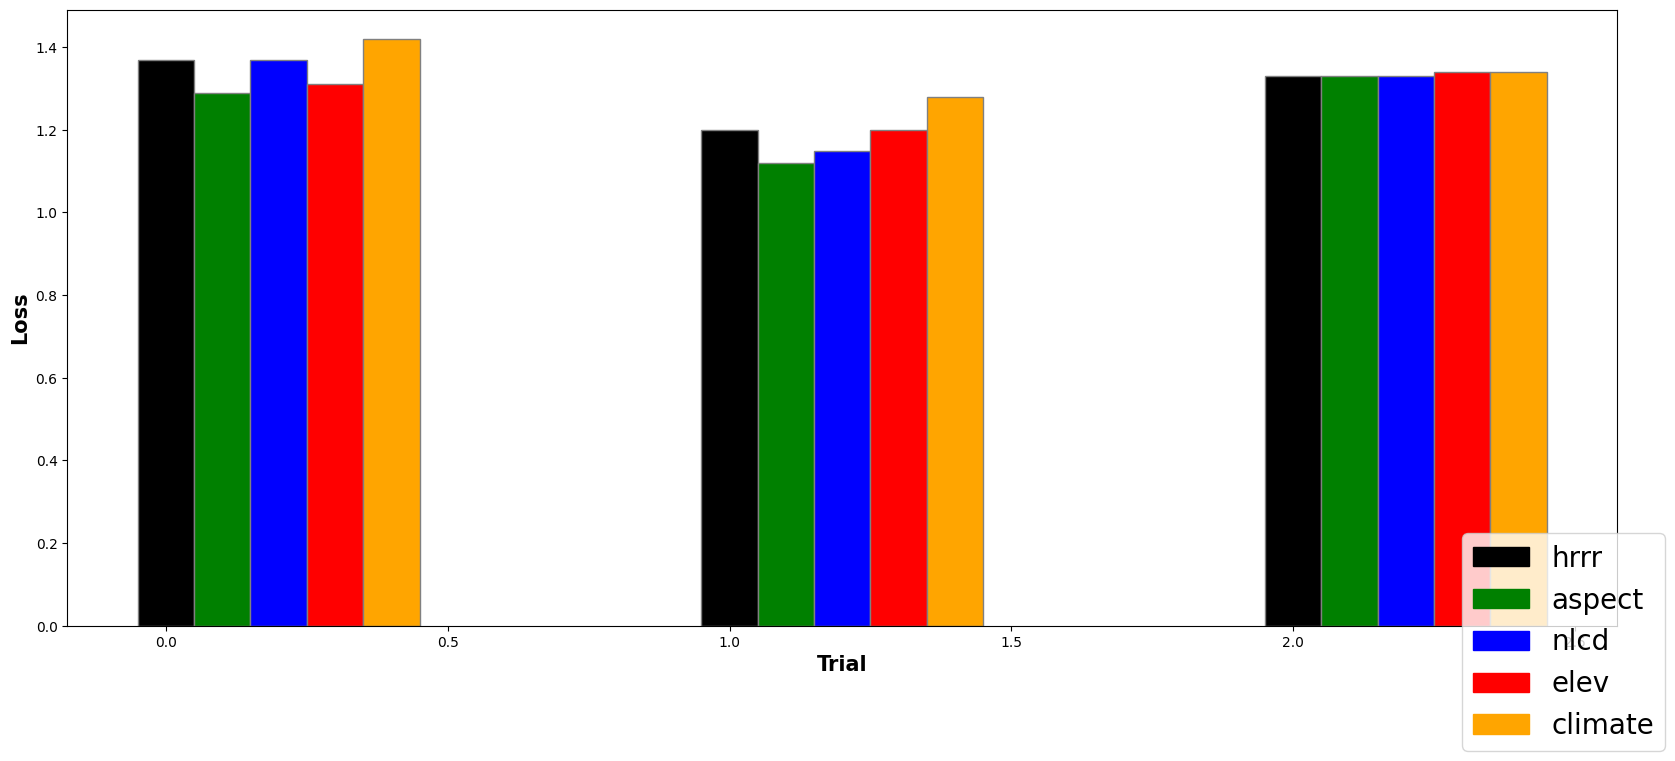

In [10]:
hrrr = [1.37, 1.2, 1.33]
aspect = [1.29, 1.12, 1.33]
nlcd = [1.37, 1.15, 1.33]
elev = [1.31, 1.2, 1.34]
clim = [1.42, 1.28, 1.34]


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize=(20, 8))

# Set position of bar on X axis
br1 = np.arange(0, 3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, hrrr, color="black", width=barWidth, edgecolor="grey", label="hrrr")
plt.bar(br2, aspect, color="g", width=barWidth, edgecolor="grey", label="aspect")
plt.bar(br3, nlcd, color="b", width=barWidth, edgecolor="grey", label="nlcd")
plt.bar(br4, elev, color="red", width=barWidth, edgecolor="grey", label="elevation")
plt.bar(br5, clim, color="orange", width=barWidth, edgecolor="grey", label="climate")

# Adding Xticks
plt.xlabel("Trial", fontweight="bold", fontsize=15)
plt.ylabel("Loss", fontweight="bold", fontsize=15)

COLORS = ["black", "green", "blue", "red", "orange"]
LEG_STR = ["hrrr", "aspect", "nlcd", "elev", "climate"]
# legend
patches = []
for i, _ in enumerate(COLORS):
    patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
    patches.append(patch)

plt.legend(
    bbox_to_anchor=(0.90, 0.15),
    loc="upper left",
    borderaxespad=0,
    handles=patches,
    fontsize=20,
)
plt.show()

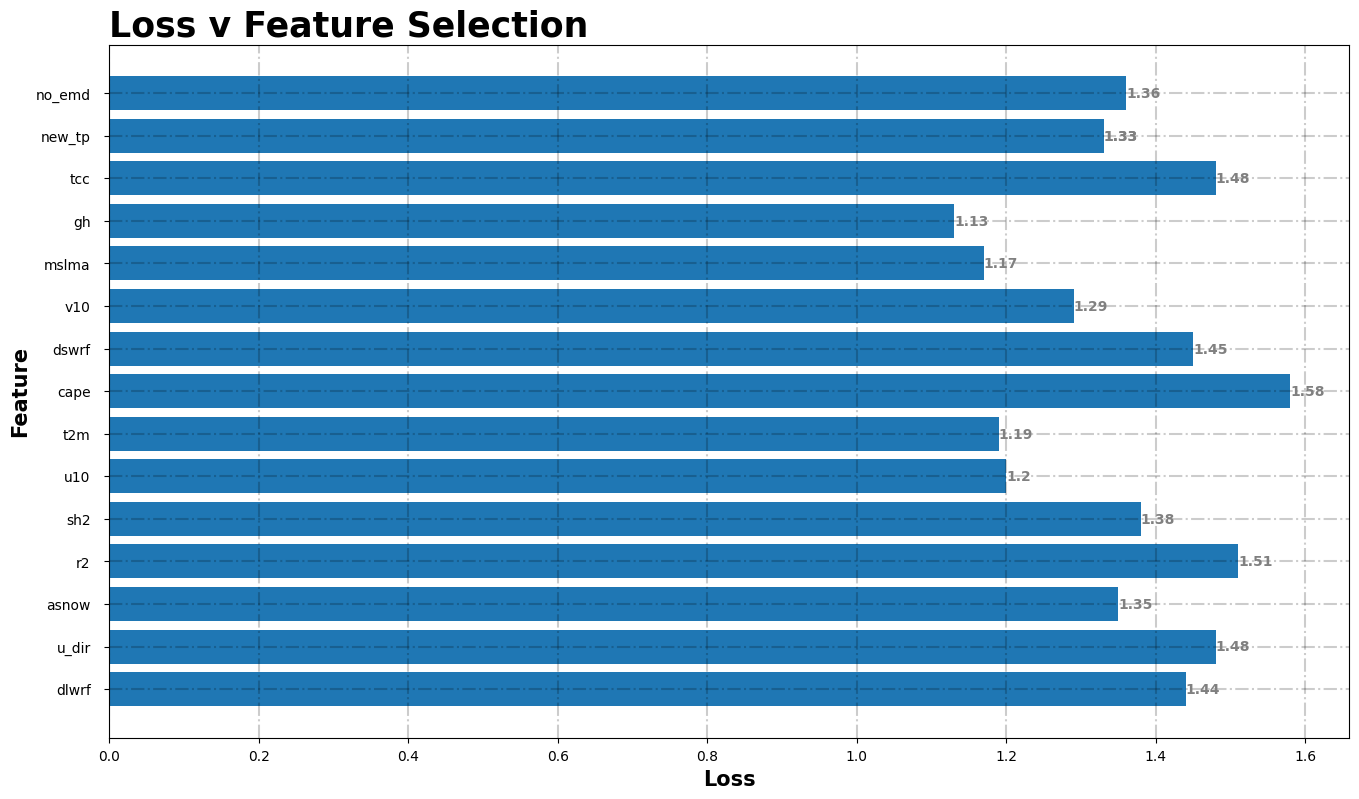

In [12]:
labels = [
    "no_emd",
    "new_tp",
    "tcc",
    "gh",
    "mslma",
    "v10",
    "new_tp",
    "dswrf",
    "cape",
    "t2m",
    "u10",
    "sh2",
    "r2",
    "asnow",
    "u_dir",
    "dlwrf",
]
values = [
    1.36,
    1.33,
    1.48,
    1.13,
    1.17,
    1.29,
    1.33,
    1.45,
    1.58,
    1.19,
    1.2,
    1.38,
    1.51,
    1.35,
    1.48,
    1.44,
]


# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Horizontal Bar Plot
ax.barh(labels, values)
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(color="black", linestyle="-.", linewidth=1.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(
        i.get_width(),
        i.get_y() + 0.5,
        str(round((i.get_width()), 2)),
        fontsize=10,
        fontweight="bold",
        color="grey",
    )


# Add Plot Title
ax.set_title("Loss v Feature Selection", loc="left", fontweight="bold", fontsize=25)
plt.xlabel("Loss", fontweight="bold", fontsize=15)
plt.ylabel("Feature", fontweight="bold", fontsize=15)

# COLORS = ["blue", "skyblue"]
# LEG_STR = ["mi_selection", "all_features"]
# # legend
# patches = []
# for i, _ in enumerate(COLORS):
#     patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
#     patches.append(patch)

# plt.legend(
#     bbox_to_anchor=(0.90, 0.15),
#     loc="upper left",
#     borderaxespad=0,
#     handles=patches,
#     fontsize=20,
# )
# Show Plot
plt.show()